<a href="https://colab.research.google.com/github/vishwesh5/Python-Deep-Learning-Projects/blob/master/Training_NN_for_Prediction_using_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download the data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [0]:
sample_image = mnist.train.images[0].reshape([28,28])

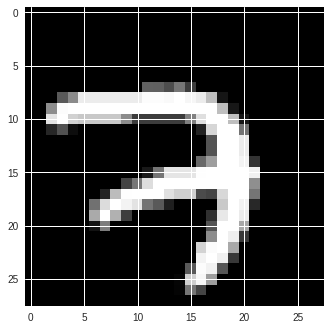

In [3]:
# Plot sample image
import matplotlib.pyplot as plt
plt.gray()
plt.imshow(sample_image)

In [4]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f04a598b3c8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f04a5980ef0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f04d203e908>)

In [5]:
mnist.validation.labels.shape

(5000, 10)

In [6]:
mnist.validation.images.shape

(5000, 784)

In [0]:
# Define parameters
learning_rate = 0.01
num_steps = 100
batch_size = 128
display_step = 1
# Network Parameters
n_hidden_1 = 300 # 1st layer number of neurons
n_hidden_2 = 300 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)
#Training Parameters
checkpoint_every = 100
checkpoint_dir = './runs/'

In [0]:
import tensorflow as tf

In [0]:
X = tf.placeholder("float", [None, num_input],name="input_x")
Y = tf.placeholder("float", [None, num_classes],name="input_y")

In [0]:
weights = {'w1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),\
           'w2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),\
           'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
          }
biases = {'b1': tf.Variable(tf.random_normal([n_hidden_1])),\
           'b2': tf.Variable(tf.random_normal([n_hidden_2])),\
           'out': tf.Variable(tf.random_normal([num_classes]))
          }

In [0]:
layer_1 = tf.add(tf.matmul(X, weights['w1']), biases['b1'])
layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
logits = tf.matmul(layer_2, weights['out']) + biases['out']

In [0]:
prediction = tf.nn.softmax(logits, name='prediction')

In [16]:
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32) ,name='accuracy')

In [0]:
import os

In [0]:
checkpoint_dir = os.path.abspath(os.path.join(checkpoint_dir, "checkpoints"))
checkpoint_prefix = os.path.join(checkpoint_dir, "model")
if not os.path.exists(checkpoint_dir):
  os.makedirs(checkpoint_dir)

# We only keep the last 2 checkpoints to manage storage
saver = tf.train.Saver(tf.global_variables(), max_to_keep=2)

In [0]:
# Initialize the variables
init = tf.global_variables_initializer()

In [23]:
all_loss = []
# Start training
with tf.Session() as sess:
    writer_1 = tf.summary.FileWriter("./runs/summary/",sess.graph)

    sum_var = tf.summary.scalar("loss", accuracy)
    write_op = tf.summary.merge_all()

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        # Extracting 
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc, summary = sess.run([loss_op, accuracy, write_op], feed_dict={X: batch_x,\
                                                                 Y: batch_y})
            all_loss.append(loss)
            writer_1.add_summary(summary, step)
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
        if step % checkpoint_every == 0:
            path = saver.save(\
                        sess, checkpoint_prefix, global_step=step)

    print("Optimization Finished!")

    # Calculate accuracy for MNIST test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels}))

Step 1, Minibatch Loss= 2628.6326, Training Accuracy= 0.211
Step 2, Minibatch Loss= 1889.8379, Training Accuracy= 0.328
Step 3, Minibatch Loss= 1940.7211, Training Accuracy= 0.352
Step 4, Minibatch Loss= 1464.7080, Training Accuracy= 0.453
Step 5, Minibatch Loss= 1453.5039, Training Accuracy= 0.461
Step 6, Minibatch Loss= 950.1848, Training Accuracy= 0.664
Step 7, Minibatch Loss= 964.3688, Training Accuracy= 0.602
Step 8, Minibatch Loss= 763.7780, Training Accuracy= 0.625
Step 9, Minibatch Loss= 671.0916, Training Accuracy= 0.680
Step 10, Minibatch Loss= 514.6049, Training Accuracy= 0.719
Step 11, Minibatch Loss= 540.8394, Training Accuracy= 0.727
Step 12, Minibatch Loss= 623.8715, Training Accuracy= 0.758
Step 13, Minibatch Loss= 536.1475, Training Accuracy= 0.727
Step 14, Minibatch Loss= 744.5597, Training Accuracy= 0.703
Step 15, Minibatch Loss= 758.3807, Training Accuracy= 0.703
Step 16, Minibatch Loss= 715.1078, Training Accuracy= 0.781
Step 17, Minibatch Loss= 429.5332, Training 